In [19]:
#to create pandas dataframe
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/neilwatt/Documents/Business Ideas/Professional Website/Clustering/Most-Recent-Cohorts-Treasury-Elements.csv')
df.describe()

,AGEGE24,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,...,PCT25_EARN_WNE_P8,PCT75_EARN_WNE_P8,PCT90_EARN_WNE_P8,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,...,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,0.392882,75.916333,13.017353,2.933902,11.498980,14.632127,7.843296,89.443315,59261.924447,9.714267,...,19328.571429,48481.632653,67168.460111,26438.280767,0.630334,492.304886,2811.654917,38754.607297,28156.153370,0.654340
std,0.176808,13.845791,11.557746,3.329924,13.788491,3.385047,2.278017,8.430222,10435.953333,4.665365,...,6186.350153,11944.453342,18072.761551,9205.672501,0.117136,1009.152744,5766.307294,10239.333625,9651.565861,0.109073
min,0.020000,22.590000,0.200000,0.200000,0.430000,5.130000,2.890000,45.400002,19509.990000,3.220000,...,9100.000000,26600.000000,37800.000000,14100.000000,0.279000,30.000000,263.000000,22600.000000,14900.000000,0.349257
25%,0.260000,68.320000,4.470000,1.120000,2.920000,12.320000,6.350000,85.599998,51833.340000,7.160000,...,14800.000000,41200.000000,57000.000000,21400.000000,0.553000,155.000000,951.000000,32100.000000,22700.000000,0.577014
50%,0.390000,77.349998,9.330000,1.890000,6.290000,14.340000,7.500000,92.180000,58867.300000,8.840000,...,17900.000000,46700.000000,64500.000000,24800.000000,0.635000,290.000000,1590.000000,37200.000000,26200.000000,0.658245
75%,0.520000,87.250000,18.389999,3.450000,15.060000,16.690001,8.910000,95.739998,65362.520000,10.940000,...,23300.000000,53300.000000,72700.000000,28500.000000,0.726000,533.000000,3184.000000,42800.000000,30600.000000,0.735894
max,0.860000,98.089996,68.129997,46.799999,98.389999,26.580000,21.000000,98.980003,95275.150000,47.349998,...,64200.000000,154200.000000,250000.000000,148500.000000,0.943000,8141.000000,54790.000000,123000.000000,127000.000000,0.942544


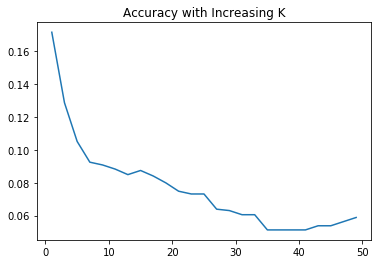

,n,accuracy
0,1,0.171573
1,3,0.128680
2,5,0.105130
3,7,0.092515
4,9,0.090833
5,11,0.088310
6,13,0.084945
7,15,0.087468
8,17,0.084104
9,19,0.079899


In [25]:
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv('/Users/neilwatt/Documents/Business Ideas/Professional Website/Clustering/Most-Recent-Cohorts-Treasury-Elements.csv')



test_idx = np.random.uniform(0, 1, len(df)) <= 0.25
train = df[test_idx==True]
test = df[test_idx==False]

features = ['MEDIAN_HH_INC']

results = []
for n in range(1, 51, 2):
    
    
    
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], train['MD_EARN_WNE_P10'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['MD_EARN_WNE_P10'], 1, 0).sum() / float(len(test))
    

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])

pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.savefig('Accuracy with increasing K.png')
pl.show()


[1 0 0 ..., 1 1 1]


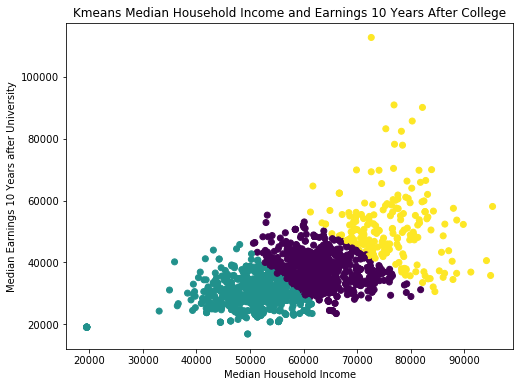

In [39]:

%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

#select median household income and median earnings after 10 years
X=df[['MEDIAN_HH_INC', 'MD_EARN_WNE_P10']]

#fit K means cluster to data
model = KMeans(n_clusters=3,algorithm='auto')
model = model.fit(X)

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(X.values[:,0], X.values[:,1], c=model.labels_.astype(float))
plt.title('Kmeans Median Household Income and Earnings 10 Years After College')
plt.xlabel('Median Household Income')
plt.ylabel('Median Earnings 10 Years after University')
plt.savefig('Kmeans Median Household Income and Earnings After Uni.png')
plt.show()

[1 0 0 ..., 1 1 1]


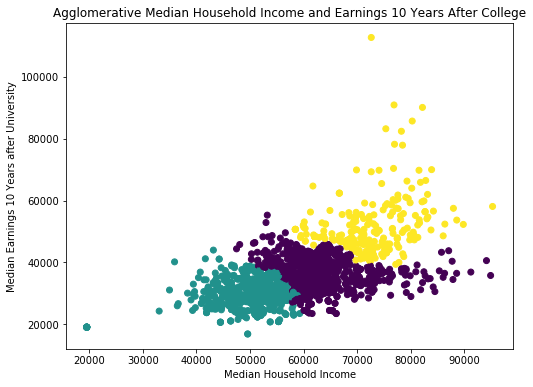

In [58]:
#agglomerative clustering


%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

#select median household income and median earnings after 10 years
X=df[['MEDIAN_HH_INC', 'MD_EARN_WNE_P10']]

#fit K means cluster to data
model = AgglomerativeClustering(n_clusters=3)
    

model = model.fit(X)

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(X.values[:,0], X.values[:,1], c=model.labels_.astype(float))
plt.title('Agglomerative Median Household Income and Earnings 10 Years After College')
plt.xlabel('Median Household Income')
plt.ylabel('Median Earnings 10 Years after University')
plt.savefig('Agglomerative Median Household Income and Earnings After Uni.png')
plt.show()

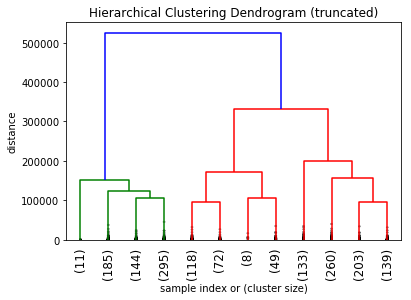

In [69]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')




plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.savefig('Dendogram of Household Income and Earnings clusters.png')
plt.show()